# Simple Linear Regression

Rafiq Islam  
2024-08-29

# Simple Linear Regression

A simple linear regression in multiple predictors/input
variables/features/independent variables/ explanatory
variables/regressors/ covariates (many names) often takes the form

$$
 y=f(\mathbf{x})+\epsilon =\mathbf{\beta}\mathbf{x}+\epsilon
 $$

where $\mathbf{\beta} \in \mathbb{R}^d$ are regression parameters or
constant values that we aim to estimate and
$\epsilon \sim \mathcal{N}(0,1)$ is a normally distributed error term
independent of $x$ or also called the white noise.

In this case, the model:

$$
y=f(x)+\epsilon=\beta_0+\beta_1 x+\epsilon
$$

Therefore, in our model we need to estimate the parameters
$\beta_0,\beta_1$. The true relationship between the explanatory
variables and the dependent variable is $y=f(x)$. But our model is
$y=f(x)+\epsilon$. Here, this $f(x)$ is the working model with the data.
In other words, $\hat{y}=f(x)=\hat{\beta}_0+\hat{\beta}_1 x$. Therefore,
there should be some error in the model prediction which we are calling
$\epsilon=\|y-\hat{y}\|$ where $y$ is the true value and $\hat{y}$ is
the predicted value. This error term is normally distributed with mean 0
and variance 1. To get the best estimate of the parameters
$\beta_0,\beta_1$ we can minimize the error term as much as possible.
So, we define the residual sum of squares (RSS) as:

Using multivariate calculus we see

Setting the partial derivatives to zero we solve for
$\hat{\beta_0},\hat{\beta_1}$ as follows

and,

Therefore, we have the following

Simple Linear Regression `slr` is applicable for a single feature data
set with contineous response variable.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

## Assumptions of Linear Regressions

-   **Linearity:** The relationship between the feature set and the
    target variable has to be linear.  
-   **Homoscedasticity:** The variance of the residuals has to be
    constant.  
-   **Independence:** All the observations are independent of each
    other.  
-   **Normality:** The distribution of the dependent variable $y$ has to
    be normal.

## Synthetic Data

To implement the algorithm, we need some synthetic data. To generate the
synthetic data we use the linear equation $y(x)=2x+\frac{1}{2}+\xi$
where $\xi\sim \mathbf{N}(0,1)$

In [2]:
X=np.random.random(100)
y=2*X+0.5+np.random.randn(100)

Note that we used two random number generators, `np.random.random(n)`
and `np.random.randn(n)`. The first one generates $n$ random numbers of
values from the range (0,1) and the second one generates values from the
standard normal distribution with mean 0 and variance or standard
deviation 1.

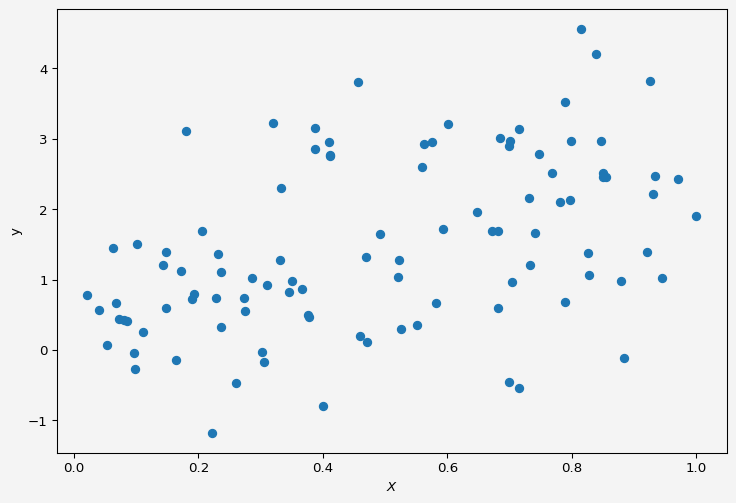

In [3]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.xlabel('$X$')
plt.ylabel('y')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

## Model

We want to fit a simple linear regression to the above data.

In [4]:
slr=LinearRegression()

Now to fit our data $X$ and $y$ we need to reshape the input variable.
Because if we look at $X$,

In [5]:
X

array([0.58165137, 0.73300215, 0.83844551, 0.36643553, 0.08588427,
       0.71535988, 0.74779653, 0.23596953, 0.41054657, 0.87937675,
       0.81468528, 0.27459872, 0.22106712, 0.02161322, 0.59369695,
       0.37814846, 0.06199941, 0.56270235, 0.41168007, 0.31059778,
       0.601365  , 0.17929473, 0.49205514, 0.14342219, 0.34998684,
       0.34530024, 0.73152089, 0.76877846, 0.23659119, 0.55942157,
       0.52281704, 0.30278201, 0.09864428, 0.46926468, 0.8839879 ,
       0.20569984, 0.26032154, 0.07179576, 0.10201967, 0.08039824,
       0.93361526, 0.47080322, 0.06727425, 0.68207873, 0.11097354,
       0.52475223, 0.67212254, 0.19354418, 0.84729644, 0.32002316,
       0.52119955, 0.9700175 , 0.79782271, 0.38769293, 0.82649356,
       0.64772788, 0.93002374, 0.23133405, 0.78088103, 0.68061644,
       0.27353832, 0.78877215, 0.85026723, 0.57447774, 0.92061849,
       0.94424568, 0.05255518, 0.37660028, 0.70137362, 0.78882206,
       0.92529713, 0.69872645, 0.79706572, 0.40017533, 0.74004

It is a one-dimensional array/vector but the `slr` object accepts input
variable as matrix or two-dimensional format.

In [6]:
X=X.reshape(-1,1)
X[:10]

array([[0.58165137],
       [0.73300215],
       [0.83844551],
       [0.36643553],
       [0.08588427],
       [0.71535988],
       [0.74779653],
       [0.23596953],
       [0.41054657],
       [0.87937675]])

Now we fit the data to our model

In [7]:
slr.fit(X,y)
slr.predict([[2],[3]])

array([4.46774606, 6.45264533])

We have our $X=2,3$ and the corresponding $y$ values are from the above
cell output, which are pretty close to the model $y=2x+\frac{1}{2}$.

In [8]:
intercept = round(slr.intercept_,4)
slope = slr.coef_

Now our model parameters are: intercept $\beta_0=$ 0.4979 and slope
$\beta_1=$ array(\[1.98489927\]).

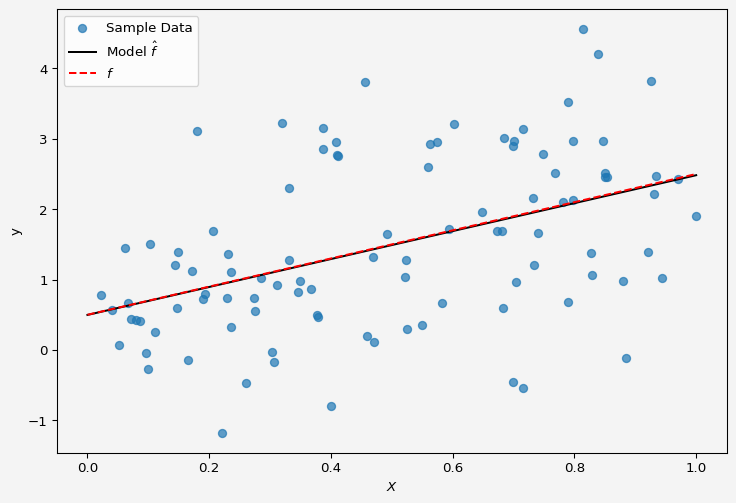

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(X,y, alpha=0.7,label="Sample Data")
plt.plot(np.linspace(0,1,100),
    slr.predict(np.linspace(0,1,100).reshape(-1,1)),
    'k',
    label='Model $\hat{f}$'
)
plt.plot(np.linspace(0,1,100),
    2*np.linspace(0,1,100)+0.5,
    'r--',
    label='$f$'
)
plt.xlabel('$X$')
plt.ylabel('y')
plt.legend(fontsize=10)
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

So the model fits the data almost perfectly.

Up next [multiple linear
regression](../../dsandml/multiplelinreg/index.qmd).

**Share on**

<a target="_blank" 
 href="https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Fmrislambd.github.io%2Fmachinelearning%2Fsimplelinreg%2F&amp;src=sdkpreparse" 
 class="fb-xfbml-parse-ignore">Share</a>

<script src="https://platform.linkedin.com/in.js" type="text/javascript">lang: en_US</script>

<script type="IN/Share" data-url="https://mrislambd.github.io/machinelearning/simplelinreg/"></script>

<a href="https://twitter.com/share?ref_src=twsrc%5Etfw" class="twitter-share-button" 
 data-url="https://mrislambd.github.io/machinelearning/simplelinreg/" data-show-count="true">Tweet</a>

<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

**You may also like**